# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [88]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

---

# 데이터 파일 로드

In [3]:
from glob import glob

file_name = glob("*이혼*.csv")
file_name

['시도_시군구_발생월별_이혼.csv',
 '시도_직업별_2007__이혼_20221015142205.csv',
 '시도_직업별_2008__이혼.csv',
 '시도_평균_이혼_연령.csv']

---

# 시도/직업별 이혼 데이터 전처리

## 2007년 시도_직업별 이혼 데이터

In [4]:
career1 = pd.read_csv(file_name[1], encoding="cp949")
career1.shape

(217, 4)

In [5]:
career1.head()

,시도별,직업별(신),2007,2007.1
0,시도별,직업별(신),남편,아내
1,전국,계,124072,124072
2,전국,"의회의원,고위임직원 및 관리자",778,182
3,전국,전문가,2519,2222
4,전국,기술공 및 준전문가,6074,2190


## 2008년 ~ 2017년 시도_직업별 이혼 데이터

In [6]:
career2 = pd.read_csv(file_name[2], encoding="cp949")
career2.shape

(210, 22)

In [7]:
career2.head()

,시도별,직업별,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,...,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1
0,시도별,직업별,남편,아내,남편,아내,남편,아내,남편,아내,...,남편,아내,남편,아내,남편,아내,남편,아내,남편,아내
1,전국,계,116535,116535,123999,123999,116858,116858,114284,114284,...,115292,115292,115510,115510,109153,109153,107328,107328,106032,106032
2,전국,관리자,2753,711,3597,957,3662,1049,3360,957,...,7850,2023,8432,2265,8635,2463,9220,2772,9359,2907
3,전국,전문가 및 관련 종사자,8050,5371,10078,7028,9338,6566,9263,6752,...,11888,9219,12871,10185,13090,10430,12634,10846,12707,10916
4,전국,사무 종사자,21368,12494,22924,13441,22100,13131,21796,13570,...,15927,12147,14286,11564,12384,11044,11140,10771,10282,10386


### 데이터 비교

- 2007년 데이터와 2008 ~ 2017년 데이터를 비교하여 같게 함

In [8]:
career1["시도별"].value_counts()

경기도        12
강원도        12
제주특별자치도    12
경상남도       12
경상북도       12
전라남도       12
전라북도       12
충청남도       12
충청북도       12
국   외      12
전국         12
울산광역시      12
대전광역시      12
광주광역시      12
인천광역시      12
대구광역시      12
부산광역시      12
서울특별시      12
시도별         1
Name: 시도별, dtype: int64

In [9]:
career2["시도별"].value_counts()

경기도        11
전국         11
제주특별자치도    11
경상남도       11
경상북도       11
전라남도       11
전라북도       11
충청남도       11
충청북도       11
강원도        11
국   외      11
세종특별자치시    11
울산광역시      11
대전광역시      11
광주광역시      11
인천광역시      11
대구광역시      11
부산광역시      11
서울특별시      11
시도별         1
Name: 시도별, dtype: int64

In [10]:
ca1 = career1.loc[career1["시도별"] == "전국", "직업별(신)"]
ca1

1                    계
2     의회의원,고위임직원 및 관리자
3                  전문가
4           기술공 및 준전문가
5               사무 종사자
6         서비스 및 판매 종사자
7     농업,임업 및 어업 숙련종사자
8        기능원 및 관련기능종사자
9      장치,기계조작 및 조립종사자
10            단순노무 종사자
11          무직, 가사, 학생
12             기타 및 미상
Name: 직업별(신), dtype: object

In [11]:
ca2 = career2.loc[career2["시도별"] == "전국", "직업별"]
ca2

1                     계
2                   관리자
3          전문가 및 관련 종사자
4                사무 종사자
5          서비스 및 판매 종사자
6           농림어업 숙련 종사자
7       기능원 및 관련 기능 종사자
8     장치,기계 조작 및 조립 종사자
9              단순노무 종사자
10           무직, 가사, 학생
11              기타 및 미상
Name: 직업별, dtype: object

In [12]:
career2["시도별"].unique()

array(['시도별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도', '국   외'], dtype=object)

In [13]:
career1["시도별"].unique()

array(['시도별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도', '국   외'], dtype=object)

In [14]:
for i in ca1:
    if i not in list(ca2):
        print(i)

의회의원,고위임직원 및 관리자
전문가
기술공 및 준전문가
농업,임업 및 어업 숙련종사자
기능원 및 관련기능종사자
장치,기계조작 및 조립종사자


### 2007년 데이터에서 "전문가", "기술공 및 준전문가" 직업군 합치기

- 2008년 이후 하나의 직업군으로 분류 되었기 때문에, 2007년 데이터 변경
- "전문가 및 관련 종사자" 직업군 데이터프레임 새로 생성 후 기존 데이터프레임과 연결

In [15]:
sido = list(career1.loc[career1["직업별(신)"] == "전문가", "시도별"])

In [16]:
job = ["전문가 및 관련 종사자" for i in range(len(sido))]

In [17]:
pro1 = career1.loc[career1["직업별(신)"] == "전문가", "2007"]
pro2 = career1.loc[career1["직업별(신)"] == "기술공 및 준전문가", "2007"]
year1 = [int(x) + int(y) for x, y in zip(pro1, pro2)]

In [18]:
pro3 = career1.loc[career1["직업별(신)"] == "전문가", "2007.1"]
pro4 = career1.loc[career1["직업별(신)"] == "기술공 및 준전문가", "2007.1"]
year2 = [int(x) + int(y) for x, y in zip(pro3, pro4)]

In [19]:
career1_temp = pd.DataFrame(data=list(zip(sido, job, year1, year2)), columns = ["시도별", "직업별(신)", "2007", "2007.1"])

In [20]:
career1 = pd.concat([career1, career1_temp])
career1.shape

(235, 4)

In [21]:
career1 = career1.reset_index(drop=True)
career1

,시도별,직업별(신),2007,2007.1
0,시도별,직업별(신),남편,아내
1,전국,계,124072,124072
2,전국,"의회의원,고위임직원 및 관리자",778,182
3,전국,전문가,2519,2222
4,전국,기술공 및 준전문가,6074,2190
...,...,...,...,...
230,전라남도,전문가 및 관련 종사자,312,98
231,경상북도,전문가 및 관련 종사자,296,104
232,경상남도,전문가 및 관련 종사자,671,314
233,제주특별자치도,전문가 및 관련 종사자,83,57


- 기존에 있던 "전문가", "기술공 및 준전문가" 데이터 삭제

In [22]:
index = career1[(career1["직업별(신)"] == "전문가") | (career1["직업별(신)"] == "기술공 및 준전문가")].index

In [23]:
career1 = career1.drop(index=index)

In [24]:
career1.shape

(199, 4)

In [25]:
career1 = career1.reset_index(drop=True)
career1

,시도별,직업별(신),2007,2007.1
0,시도별,직업별(신),남편,아내
1,전국,계,124072,124072
2,전국,"의회의원,고위임직원 및 관리자",778,182
3,전국,사무 종사자,25215,13760
4,전국,서비스 및 판매 종사자,26942,15851
...,...,...,...,...
194,전라남도,전문가 및 관련 종사자,312,98
195,경상북도,전문가 및 관련 종사자,296,104
196,경상남도,전문가 및 관련 종사자,671,314
197,제주특별자치도,전문가 및 관련 종사자,83,57


### 직업명 동일하게 변경

- 2007년 직업군을 2008년 이후 데이터와 동일하게 변경

In [26]:
career1["직업별(신)"] = career1["직업별(신)"].str.replace("의회의원,고위임직원 및 관리자", "관리자")
career1["직업별(신)"] = career1["직업별(신)"].str.replace("농업,임업 및 어업 숙련종사자", "농림어업 숙련 종사자")
career1["직업별(신)"] = career1["직업별(신)"].str.replace("기능원 및 관련기능종사자", "기능원 및 관련 기능 종사자")
career1["직업별(신)"] = career1["직업별(신)"].str.replace("장치,기계조작 및 조립종사자", "장치,기계 조작 및 조립 종사자")

### 컬럼명 변경하기

- 2007년 직업별 컬럼명을 2008년 이후 데이터와 동일하게 변경

In [27]:
career1 = career1.rename({'직업별(신)':"직업별"}, axis="columns")
career1

,시도별,직업별,2007,2007.1
0,시도별,직업별(신),남편,아내
1,전국,계,124072,124072
2,전국,관리자,778,182
3,전국,사무 종사자,25215,13760
4,전국,서비스 및 판매 종사자,26942,15851
...,...,...,...,...
194,전라남도,전문가 및 관련 종사자,312,98
195,경상북도,전문가 및 관련 종사자,296,104
196,경상남도,전문가 및 관련 종사자,671,314
197,제주특별자치도,전문가 및 관련 종사자,83,57


### 직업별 이혼 데이터 합치기

- 세종시 데이터가 있는 2008년 이후 데이터를 기준으로 합치기

In [28]:
df_career = pd.merge(career1, career2, on=["시도별", "직업별"], how="right")
df_career.shape

(210, 24)

In [29]:
df_career.head(3)

,시도별,직업별,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,...,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1
0,시도별,직업별,NaN,NaN,남편,아내,남편,아내,남편,아내,...,남편,아내,남편,아내,남편,아내,남편,아내,남편,아내
1,전국,계,124072,124072,116535,116535,123999,123999,116858,116858,...,115292,115292,115510,115510,109153,109153,107328,107328,106032,106032
2,전국,관리자,778,182,2753,711,3597,957,3662,1049,...,7850,2023,8432,2265,8635,2463,9220,2772,9359,2907


### 국외 데이터 삭제하기

In [30]:
df_career["시도별"] = df_career["시도별"].map(lambda x: x.replace(" ", ""))

In [31]:
df_career[df_career["시도별"] == "국외"].index

Int64Index([199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209], dtype='int64')

In [32]:
df_career = df_career.drop(index=df_career.loc[df_career["시도별"] == "국외"].index)
df_career.shape

(199, 24)

In [33]:
df_career.head(2)

,시도별,직업별,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,...,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1
0,시도별,직업별,NaN,NaN,남편,아내,남편,아내,남편,아내,...,남편,아내,남편,아내,남편,아내,남편,아내,남편,아내
1,전국,계,124072,124072,116535,116535,123999,123999,116858,116858,...,115292,115292,115510,115510,109153,109153,107328,107328,106032,106032


### 2007년 데이터 성별 정보 채우기

- 데이터를 합치면서 발생한 결측치 채우기

In [34]:
df_career["2007"].loc[0] = "남편"
df_career["2007.1"].loc[0] = "아내"

In [35]:
df_career.head(2)

,시도별,직업별,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,...,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1
0,시도별,직업별,남편,아내,남편,아내,남편,아내,남편,아내,...,남편,아내,남편,아내,남편,아내,남편,아내,남편,아내
1,전국,계,124072,124072,116535,116535,123999,123999,116858,116858,...,115292,115292,115510,115510,109153,109153,107328,107328,106032,106032


### 성별 정보 컬럼으로 만들기

- tidy data로 만들기 쉽게 성별 정보를 컬럼으로 변경

In [36]:
col = df_career.columns

In [37]:
sex = df_career.iloc[0]

In [38]:
df_career.columns = [col, sex]

### 성별 정보를 담고 있는 행 삭제

- 기존에 성별 정보를 담고 있던 행 삭제

In [39]:
df_career = df_career.drop(index=0)
df_career.head(2)

,시도별,직업별,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,...,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1
,시도별,직업별,남편,아내,남편,아내,남편,아내,남편,아내,...,남편,아내,남편,아내,남편,아내,남편,아내,남편,아내
1,전국,계,124072,124072,116535,116535,123999,123999,116858,116858,...,115292,115292,115510,115510,109153,109153,107328,107328,106032,106032
2,전국,관리자,778,182,2753,711,3597,957,3662,1049,...,7850,2023,8432,2265,8635,2463,9220,2772,9359,2907


### 연도와 성별 정보 열로 만들기

- tidy data로 만들기 위해 열로 변경

In [40]:
df_career = df_career.melt(id_vars=[("시도별", "시도별"), ("직업별", "직업별")])
df_career.head(2)

,"(시도별, 시도별)","(직업별, 직업별)",None,0,value
0,전국,계,2007,남편,124072
1,전국,관리자,2007,남편,778


In [41]:
df_career.columns = ["시도별", "직업별", "연도", "성별", "이혼건수"]
df_career.head(2)

,시도별,직업별,연도,성별,이혼건수
0,전국,계,2007,남편,124072
1,전국,관리자,2007,남편,778


### 성별 정보 수정하기

In [42]:
df_career["성별"] = df_career["성별"].str.replace("남편", "남성")
df_career["성별"] = df_career["성별"].str.replace("아내", "여성")
df_career.sample(5)

,시도별,직업별,연도,성별,이혼건수
494,세종특별자치시,기타 및 미상,2008,남성,-
2608,대구광역시,관리자,2013.1,여성,67
4235,울산광역시,계,2017.1,여성,2396
3825,광주광역시,단순노무 종사자,2016.1,여성,170
4062,경기도,사무 종사자,2017,남성,3000


### 연도 정보 수정하기

In [43]:
df_career["연도"] = df_career["연도"].map(lambda x: x[:4])

### 세종시 결측치 정리하기

In [44]:
df_career["이혼건수"] = df_career["이혼건수"].replace("-", np.nan)

### 시도/직업 합계 데이터프레임

- 직업 구분 없는 합계 데이터만 별도로 데이터프레임 만들기
- 이후 시도별 평균 이혼 연령 데이터와 결합하기 위함

In [45]:
df_career_total = df_career.loc[(df_career["직업별"] == "계") & (df_career["시도별"] != "전국")]
df_career_total = df_career_total.reset_index(drop=True)
df_career_total = df_career_total.drop(columns="직업별")

In [46]:
df_career_total.head(3)

,시도별,연도,성별,이혼건수
0,서울특별시,2007,남성,24615
1,부산광역시,2007,남성,8677
2,대구광역시,2007,남성,5330


### 시도/직업별 데이터프레임

- 직업이 구분되어 있는 데이터만 남기기

In [47]:
df_career = df_career[(df_career["직업별"] != "계") & (df_career["시도별"] != "전국")]
df_career = df_career.reset_index(drop=True)
df_career = df_career.reindex(columns=["시도별", "연도", "직업별", "성별", "이혼건수"])
df_career

,시도별,연도,직업별,성별,이혼건수
0,서울특별시,2007,관리자,남성,173
1,서울특별시,2007,전문가 및 관련 종사자,남성,1696
2,서울특별시,2007,사무 종사자,남성,5399
3,서울특별시,2007,서비스 및 판매 종사자,남성,5876
4,서울특별시,2007,농림어업 숙련 종사자,남성,75
...,...,...,...,...,...
3735,제주특별자치도,2017,기능원 및 관련 기능 종사자,여성,9
3736,제주특별자치도,2017,"장치,기계 조작 및 조립 종사자",여성,4
3737,제주특별자치도,2017,단순노무 종사자,여성,57
3738,제주특별자치도,2017,"무직, 가사, 학생",여성,347


In [132]:
df_career["연도"] = pd.to_numeric(df_career["연도"],errors="coerce")
df_career["이혼건수"] = pd.to_numeric(df_career["이혼건수"],errors="coerce")

In [133]:
df_career.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     3740 non-null   object 
 1   연도      3740 non-null   int64  
 2   직업별     3740 non-null   object 
 3   성별      3740 non-null   object 
 4   이혼건수    3640 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 146.2+ KB


---

# 시도/연도별 이혼 데이터 전처리

In [48]:
df_temp = pd.read_csv(file_name[0], encoding="cp949")
df_temp.shape

(11, 20)

In [49]:
df_temp.head(2)

,시점,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,국외
0,2007,124072,24615,8677,5330,7854,2925,3449,2581,-,29964,3818,3558,4703,4417,4240,5571,7493,1561,3316
1,2008,116535,23319,7908,5005,7414,2836,3236,2295,-,28379,3394,3354,4472,3784,4021,5287,6981,1238,3612


### 국외 데이터 삭제하기

In [50]:
df_temp = df_temp.drop(columns="국외")
df_temp.head(2)

,시점,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,2007,124072,24615,8677,5330,7854,2925,3449,2581,-,29964,3818,3558,4703,4417,4240,5571,7493,1561
1,2008,116535,23319,7908,5005,7414,2836,3236,2295,-,28379,3394,3354,4472,3784,4021,5287,6981,1238


### 세종시 결측치 정리하기

In [51]:
df_temp["세종특별자치시"] = df_temp["세종특별자치시"].replace("-", np.nan, regex=True)
df_temp.head(2)

,시점,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,2007,124072,24615,8677,5330,7854,2925,3449,2581,NaN,29964,3818,3558,4703,4417,4240,5571,7493,1561
1,2008,116535,23319,7908,5005,7414,2836,3236,2295,NaN,28379,3394,3354,4472,3784,4021,5287,6981,1238


### 시도 정보 열로 만들기

In [52]:
df_temp = df_temp.melt(id_vars=["시점"])
df_temp.head(2)

,시점,variable,value
0,2007,전국,124072
1,2008,전국,116535


In [53]:
df_temp.columns = ["연도", "시도별", "이혼건수"]
df_temp.head(2)

,연도,시도별,이혼건수
0,2007,전국,124072
1,2008,전국,116535


### 시도별 데이터 프레임

In [54]:
df_temp = df_temp.reset_index(drop=True)
df_temp

,연도,시도별,이혼건수
0,2007,전국,124072
1,2008,전국,116535
2,2009,전국,123999
3,2010,전국,116858
4,2011,전국,114284
...,...,...,...
193,2013,제주특별자치도,1440
194,2014,제주특별자치도,1530
195,2015,제주특별자치도,1447
196,2016,제주특별자치도,1552


##### 전국 데이터

In [55]:
df_temp_all = df_temp[df_temp["시도별"] == "전국"]
df_temp_all = df_temp_all.reindex(columns=["시도별", "연도", "이혼건수"])
df_temp_all

,시도별,연도,이혼건수
0,전국,2007,124072
1,전국,2008,116535
2,전국,2009,123999
3,전국,2010,116858
4,전국,2011,114284
5,전국,2012,114316
6,전국,2013,115292
7,전국,2014,115510
8,전국,2015,109153
9,전국,2016,107328


##### 시도별 데이터

In [56]:
index = df_temp[df_temp["시도별"] == "전국"].index
df_temp = df_temp.drop(index=index)
df_temp = df_temp.reset_index(drop=True)
df_temp = df_temp.reindex(columns=["시도별", "연도", "이혼건수"])
df_temp

,시도별,연도,이혼건수
0,서울특별시,2007,24615
1,서울특별시,2008,23319
2,서울특별시,2009,23920
3,서울특별시,2010,21768
4,서울특별시,2011,20617
...,...,...,...
182,제주특별자치도,2013,1440
183,제주특별자치도,2014,1530
184,제주특별자치도,2015,1447
185,제주특별자치도,2016,1552


---

# 시도별 평균 이혼 연령 데이터 전처리

In [57]:
df_age = pd.read_csv(file_name[3], encoding="cp949")
df_age.shape

(20, 23)

In [58]:
df_age.head(2)

,시도별,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,...,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1
0,시도별,남편,아내,남편,아내,남편,아내,남편,아내,남편,...,남편,아내,남편,아내,남편,아내,남편,아내,남편,아내
1,전국,43.20,39.48,44.30,40.45,44.48,40.65,44.99,41.13,45.43,...,46.24,42.42,46.54,42.84,46.93,43.31,47.19,43.64,47.57,44.02


### 국외 데이터 삭제하기

In [59]:
df_age["시도별"] = df_age["시도별"].map(lambda x: x.replace(" ", ""))

In [60]:
df_age[df_age["시도별"] == "국외"].index

Int64Index([19], dtype='int64')

In [61]:
df_age = df_age.drop(index=df_age[df_age["시도별"] == "국외"].index)
df_age.tail(2)

,시도별,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,...,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1
17,경상남도,42.50,38.71,43.58,40.06,43.82,40.44,44.19,40.64,44.75,...,45.61,42.01,46.00,42.42,46.42,42.77,46.64,43.25,47.23,43.61
18,제주특별자치도,42.28,39.02,43.54,40.07,43.59,40.49,43.93,40.77,44.51,...,45.54,42.63,45.70,42.58,45.58,42.56,46.37,43.11,46.77,43.63


### 성별 정보 컬럼으로 만들기

In [62]:
col = df_age.columns

In [63]:
sex = df_age.loc[0]

In [64]:
df_age.columns = [col, sex]

### 성별 정보를 담고 있는 행 삭제

In [65]:
df_age = df_age.drop(index=0)
df_age.head(2)

,시도별,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,...,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1
,시도별,남편,아내,남편,아내,남편,아내,남편,아내,남편,...,남편,아내,남편,아내,남편,아내,남편,아내,남편,아내
1,전국,43.20,39.48,44.30,40.45,44.48,40.65,44.99,41.13,45.43,...,46.24,42.42,46.54,42.84,46.93,43.31,47.19,43.64,47.57,44.02
2,서울특별시,44.16,40.91,45.50,42.16,45.51,42.19,46.08,42.77,46.34,...,47.40,44.24,47.82,44.77,48.19,45.18,48.58,45.68,48.78,45.97


### 연도와 성별 정보 열로 만들기

In [66]:
df_age = df_age.melt(id_vars=[("시도별", "시도별")])
df_age.head(2)

,"(시도별, 시도별)",None,0,value
0,전국,2007,남편,43.20
1,서울특별시,2007,남편,44.16


In [67]:
df_age.columns = ["시도별", "연도", "성별", "평균나이"]
df_age.head(2)

,시도별,연도,성별,평균나이
0,전국,2007,남편,43.20
1,서울특별시,2007,남편,44.16


### 성별 정보 수정하기

In [68]:
df_age["성별"] = df_age["성별"].replace("남편", "남성")
df_age["성별"] = df_age["성별"].replace("아내", "여성")
df_age.sample(5)

,시도별,연도,성별,평균나이
1,서울특별시,2007,남성,44.16
44,세종특별자치시,2008,남성,-
190,강원도,2012,남성,45.73
129,대구광역시,2010.1,여성,41.97
252,전국,2014,남성,46.54


### 연도 정보 수정하기

In [69]:
df_age["연도"] = df_age["연도"].map(lambda x: x[:4])
df_age["연도"].unique()

array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'], dtype=object)

### 시도별 평균 나이 데이터프레임

##### 전국 데이터

In [70]:
df_age_all = df_age.loc[df_age["시도별"] == "전국"].reset_index(drop=True)
df_age_all.head(2)

,시도별,연도,성별,평균나이
0,전국,2007,남성,43.20
1,전국,2007,여성,39.48


In [71]:
sido = ["전국" for i in range(11)]
year = [i for i in range(2007, 2018)]

In [72]:
m_age = list(df_age_all.loc[df_age_all["성별"] == "남성", "평균나이"])
f_age = list(df_age_all.loc[df_age_all["성별"] == "여성", "평균나이"])
mean_age = [round((float(x) + float(y)) / 2, 2) for x, y in zip(m_age, f_age)]

In [73]:
df_age_all = pd.DataFrame(data=list(zip(sido, year, mean_age)), columns = ["시도별", "연도", "평균나이"])
df_age_all

,시도별,연도,평균나이
0,전국,2007,41.34
1,전국,2008,42.38
2,전국,2009,42.56
3,전국,2010,43.06
4,전국,2011,43.48
5,전국,2012,43.94
6,전국,2013,44.33
7,전국,2014,44.69
8,전국,2015,45.12
9,전국,2016,45.41


##### 시도별 데이터

In [74]:
df_age = df_age.loc[df_age["시도별"] != "전국"].reset_index(drop=True)
df_age.head()

,시도별,연도,성별,평균나이
0,서울특별시,2007,남성,44.16
1,부산광역시,2007,남성,44.14
2,대구광역시,2007,남성,42.58
3,인천광역시,2007,남성,43.15
4,광주광역시,2007,남성,42.55


---

# 데이터프레임 합치기

##### 시도/연도/성별별 이혼건수/평균나이 데이터

In [75]:
df_1 = pd.merge(df_career_total, df_age, on=["시도별", "연도", "성별"], how="inner")
df_1.shape

(374, 5)

In [76]:
df_1.head()

,시도별,연도,성별,이혼건수,평균나이
0,서울특별시,2007,남성,24615,44.16
1,부산광역시,2007,남성,8677,44.14
2,대구광역시,2007,남성,5330,42.58
3,인천광역시,2007,남성,7854,43.15
4,광주광역시,2007,남성,2925,42.55


In [128]:
df_1["연도"] = pd.to_numeric(df_1["연도"],errors="coerce")
df_1["이혼건수"] = pd.to_numeric(df_1["이혼건수"],errors="coerce")
df_1["평균나이"] = pd.to_numeric(df_1["평균나이"],errors="coerce")

In [129]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 373
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     374 non-null    object 
 1   연도      374 non-null    int64  
 2   성별      374 non-null    object 
 3   이혼건수    364 non-null    float64
 4   평균나이    364 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 17.5+ KB


##### 전국 연도별 이혼건수/평균나이 데이터

In [77]:
df_2 = pd.merge(df_temp_all, df_age_all, on=["시도별", "연도"], how="inner")
df_2.shape

(11, 4)

In [78]:
df_2.head()

,시도별,연도,이혼건수,평균나이
0,전국,2007,124072,41.34
1,전국,2008,116535,42.38
2,전국,2009,123999,42.56
3,전국,2010,116858,43.06
4,전국,2011,114284,43.48


In [130]:
df_2["연도"] = pd.to_numeric(df_2["연도"],errors="coerce")
df_2["이혼건수"] = pd.to_numeric(df_2["이혼건수"],errors="coerce")
df_2["평균나이"] = pd.to_numeric(df_2["평균나이"],errors="coerce")

In [131]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     11 non-null     object 
 1   연도      11 non-null     int64  
 2   이혼건수    11 non-null     int64  
 3   평균나이    11 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 440.0+ bytes


---

# 최종 데이터프레임 확인

## 성별별 이혼건수/평균나이 데이터

In [134]:
df_1.sample(3)

,시도별,연도,성별,이혼건수,평균나이
207,인천광역시,2013,남성,7253.0,45.96
32,경상남도,2007,여성,7154.0,38.71
136,서울특별시,2011,남성,20617.0,46.34


### 데이터 개수

In [135]:
df_1.shape

(374, 5)

### 데이터 요약하기

In [136]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 373
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     374 non-null    object 
 1   연도      374 non-null    int64  
 2   성별      374 non-null    object 
 3   이혼건수    364 non-null    float64
 4   평균나이    364 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 17.5+ KB


### 결측치 확인

In [137]:
df_1.isnull().sum()

시도별      0
연도       0
성별       0
이혼건수    10
평균나이    10
dtype: int64

### 기술통계

In [138]:
df_1.describe()

,연도,이혼건수,평균나이
count,374.000000,364.000000,364.000000
mean,2012.000000,6655.167582,43.594643
std,3.166514,7012.219535,2.338645
min,2007.000000,178.000000,37.900000
25%,2009.000000,3160.500000,41.970000
50%,2012.000000,4141.000000,43.610000
75%,2015.000000,7038.000000,45.525000
max,2017.000000,29964.000000,48.780000


In [140]:
df_1.describe(include="O")

,시도별,성별
count,374,374
unique,17,2
top,서울특별시,남성
freq,22,187


## 전국 이혼건수/평균나이 데이터

In [142]:
df_2.sample(3)

,시도별,연도,이혼건수,평균나이
5,전국,2012,114316,43.94
4,전국,2011,114284,43.48
10,전국,2017,106032,45.80


### 데이터 개수

In [143]:
df_2.shape

(11, 4)

### 데이터 요약하기

In [144]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     11 non-null     object 
 1   연도      11 non-null     int64  
 2   이혼건수    11 non-null     int64  
 3   평균나이    11 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 440.0+ bytes


### 결측치 확인

In [145]:
df_2.isnull().sum()

시도별     0
연도      0
이혼건수    0
평균나이    0
dtype: int64

### 기술통계

In [146]:
df_2.describe()

,연도,이혼건수,평균나이
count,11.000000,11.000000,11.000000
mean,2012.000000,114852.636364,43.828182
std,3.316625,5862.171872,1.402639
min,2007.000000,106032.000000,41.340000
25%,2009.500000,111718.500000,42.810000
50%,2012.000000,115292.000000,43.940000
75%,2014.500000,116696.500000,44.905000
max,2017.000000,124072.000000,45.800000


In [147]:
df_2.describe(include="O")

,시도별
count,11
unique,1
top,전국
freq,11


## 직업/성별별 이혼건수 데이터

In [148]:
df_career.sample(3)

,시도별,연도,직업별,성별,이혼건수
1020,서울특별시,2010,관리자,남성,831.0
2385,서울특별시,2014,기능원 및 관련 기능 종사자,남성,1104.0
3027,전라남도,2015,단순노무 종사자,여성,198.0


### 데이터 개수

In [149]:
df_career.shape

(3740, 5)

### 데이터 요약하기

In [150]:
df_career.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     3740 non-null   object 
 1   연도      3740 non-null   int64  
 2   직업별     3740 non-null   object 
 3   성별      3740 non-null   object 
 4   이혼건수    3640 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 146.2+ KB


### 결측치 확인

In [151]:
df_career.isnull().sum()

시도별       0
연도        0
직업별       0
성별        0
이혼건수    100
dtype: int64

### 기술통계

In [152]:
df_career.describe()

,연도,이혼건수
count,3740.000000,3640.000000
mean,2012.000000,665.516758
std,3.162701,1289.201769
min,2007.000000,0.000000
25%,2009.000000,85.000000
50%,2012.000000,291.500000
75%,2015.000000,661.000000
max,2017.000000,17555.000000


In [153]:
df_career.describe(include="O")

,시도별,직업별,성별
count,3740,3740,3740
unique,17,10,2
top,서울특별시,관리자,남성
freq,220,374,1870


---

# 데이터 시각화

## 결측치 시각화

- 시도별로 구분되어 있는 데이터의 경우 '이혼건수' 컬럼에서 '세종특별자치시'의 결측치 확인 가능하다.
- 전국 데이터의 경우 결측치가 없다.

##### 성별별 이혼건수/평균나이 데이터

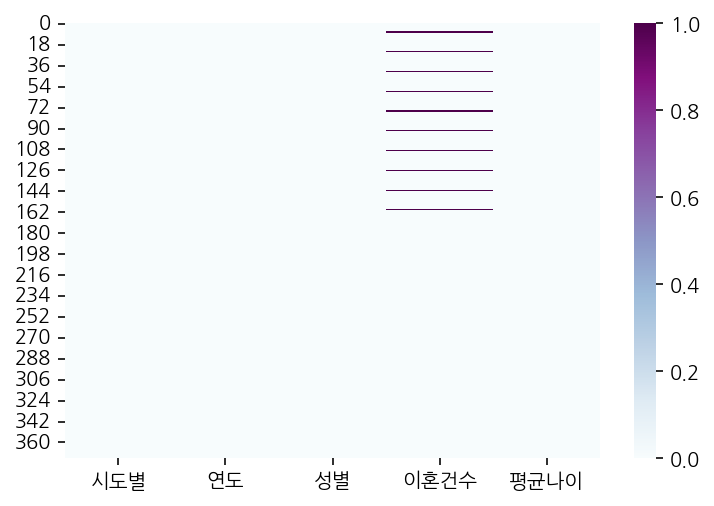

In [103]:
sns.heatmap(df_1.isnull(), cmap="BuPu");

##### 전국 이혼건수/평균나이 데이터

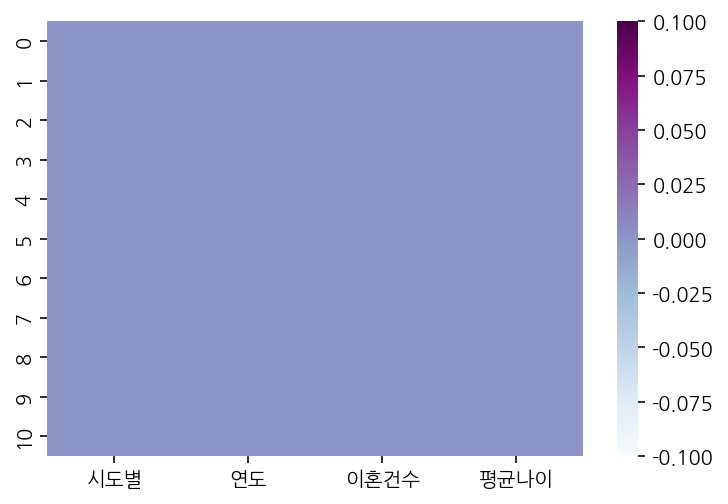

In [93]:
sns.heatmap(df_2.isnull(), cmap="BuPu");

##### 직업/성별별 이혼건수 데이터

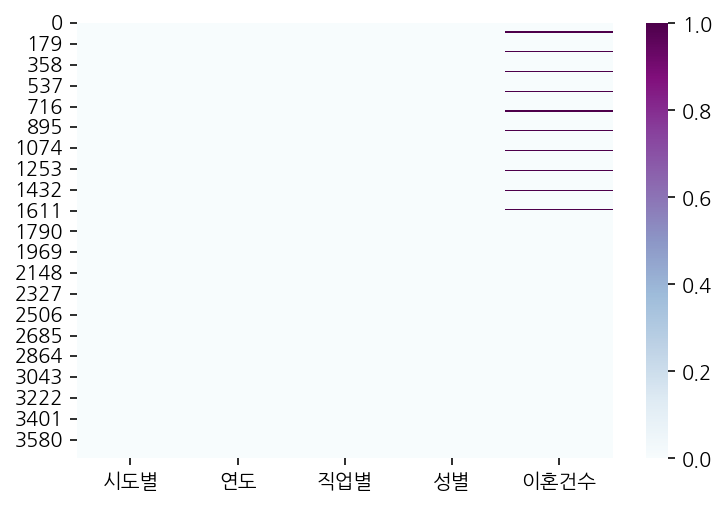

In [94]:
sns.heatmap(df_career.isnull(), cmap="BuPu");

## histogram

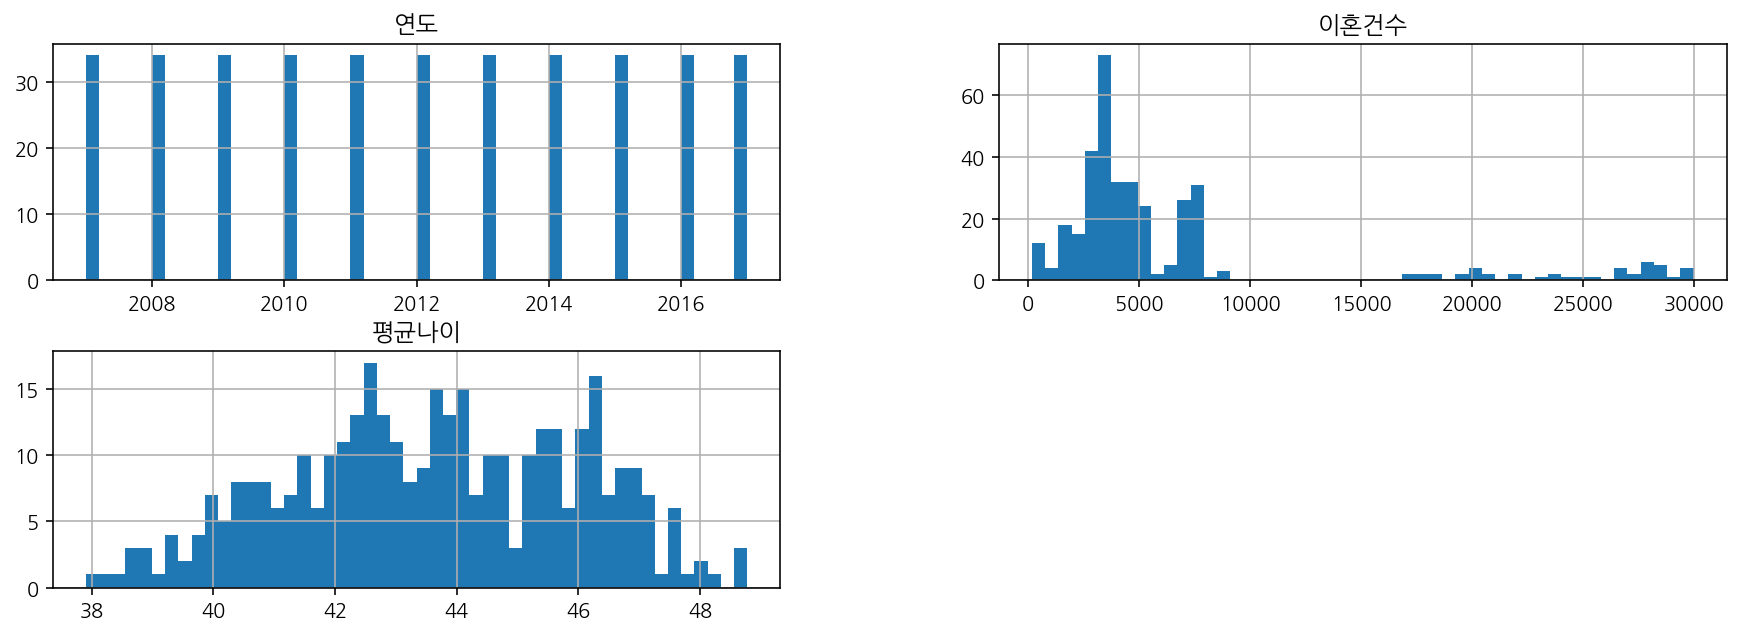

In [184]:
df_1.hist(figsize=(15, 5), bins=50);

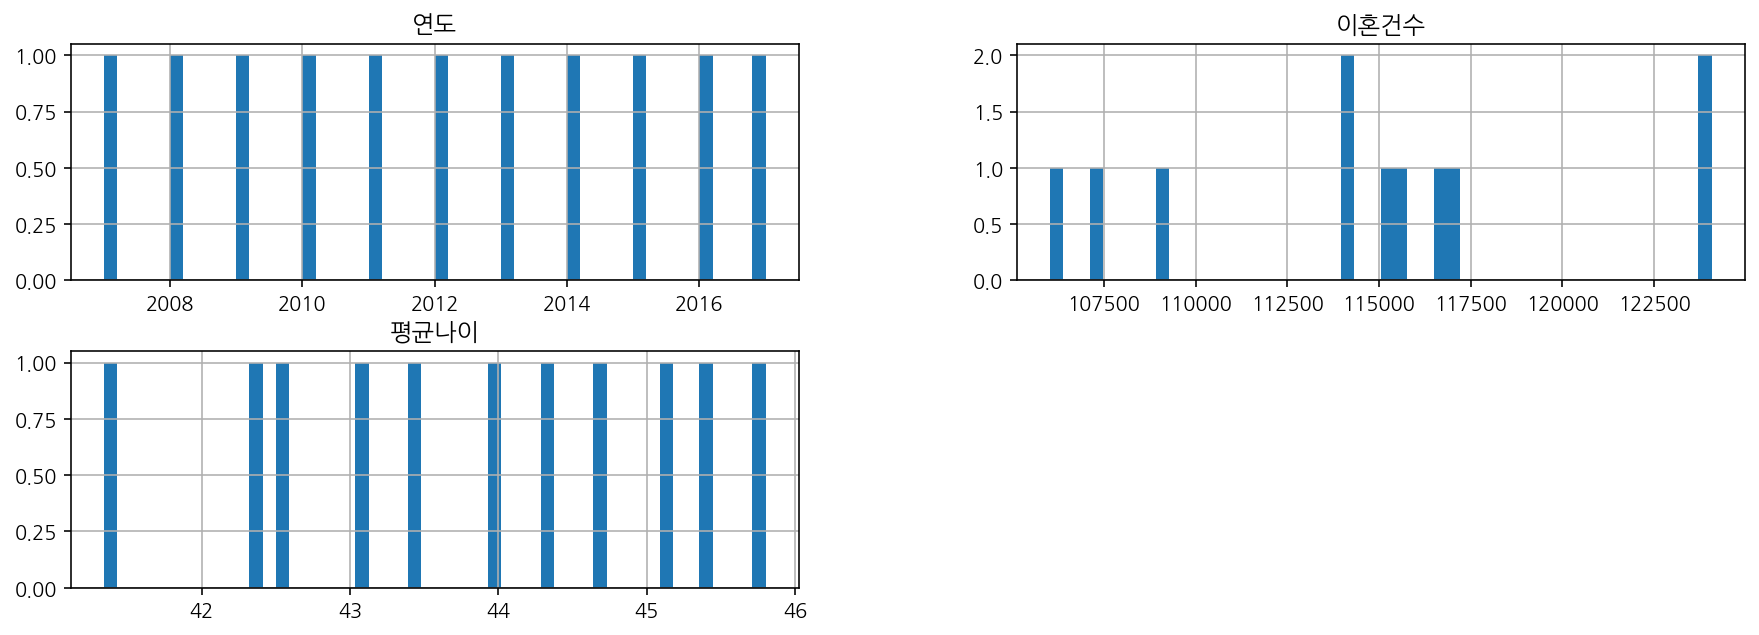

In [195]:
df_2.hist(figsize=(15, 5), bins=50);

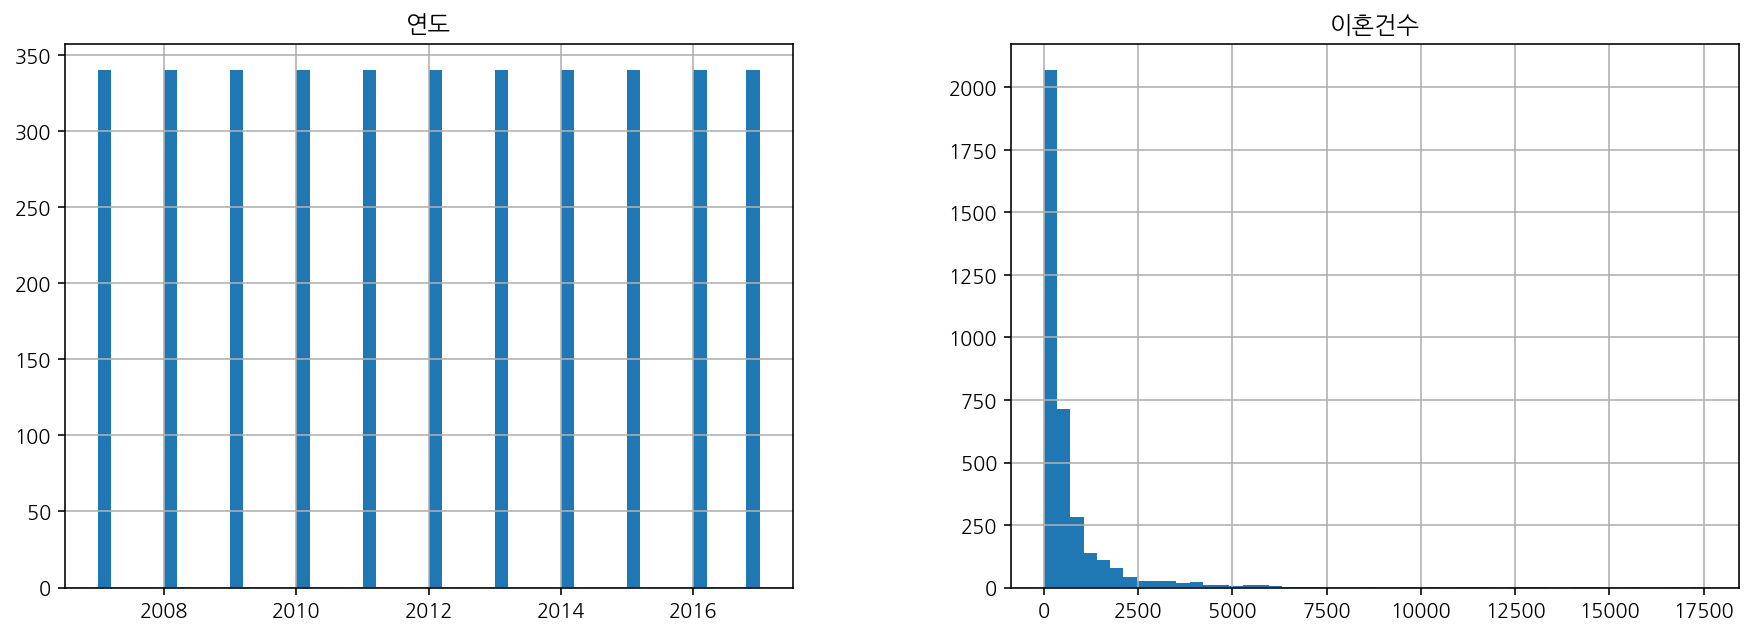

In [197]:
df_career.hist(figsize=(15, 5), bins=50);

## barplot

##### 시도별 이혼건수를 성별을 구분하여 시각화

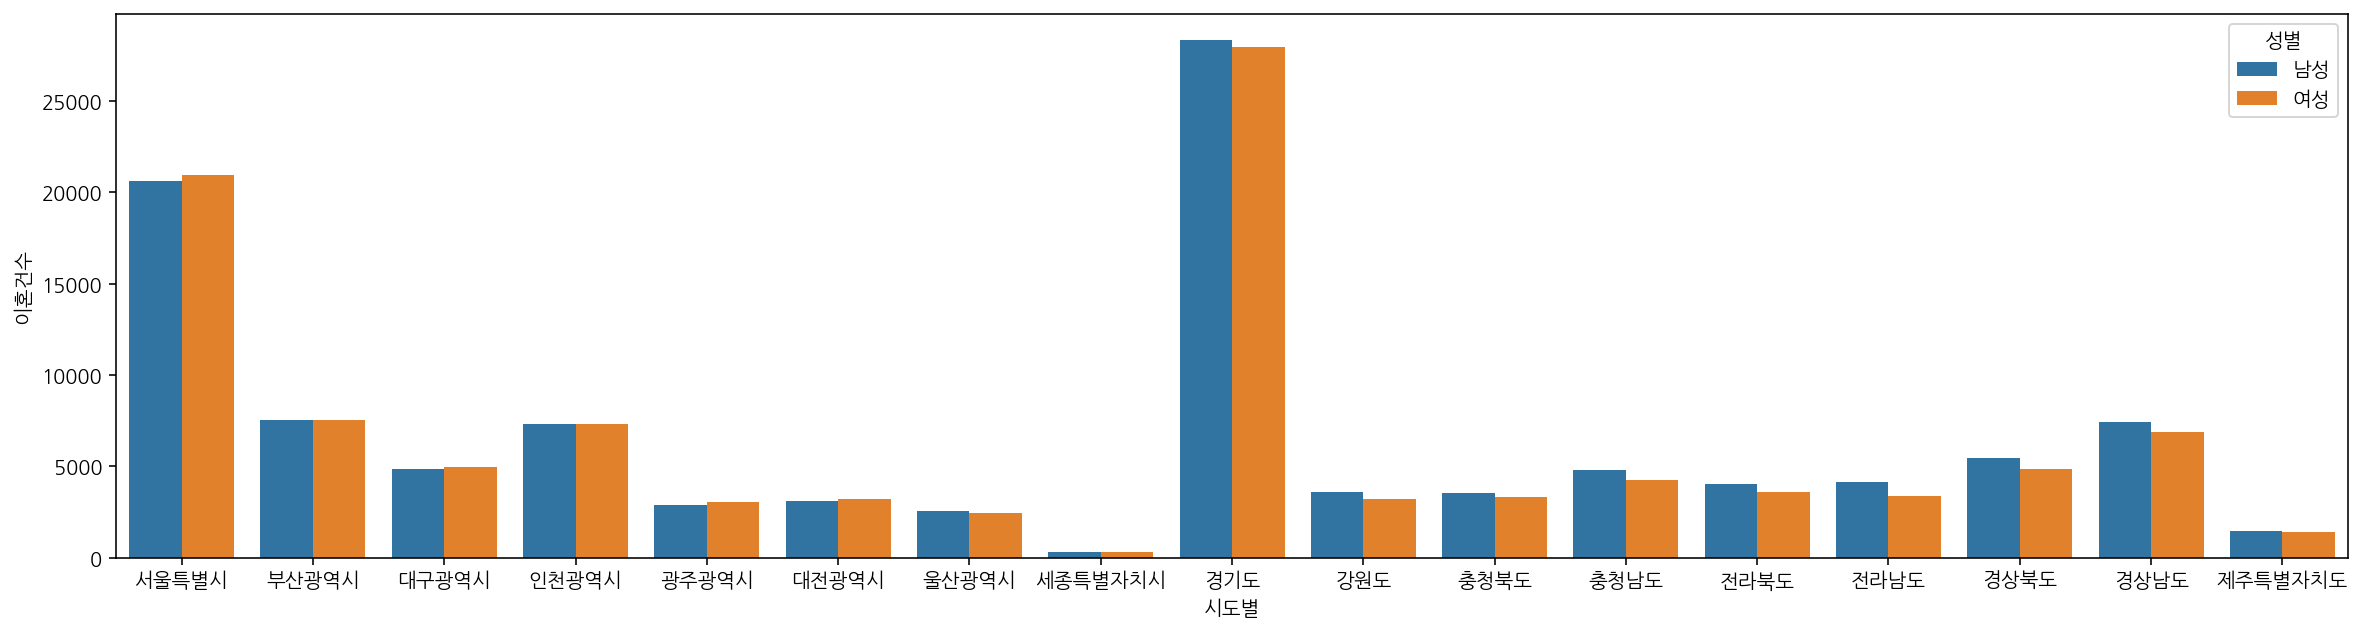

In [192]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df_1, x="시도별", y="이혼건수", hue="성별", ci=None);

##### 시도별 이혼 평균 나이를 성별을 구분하여 시각화

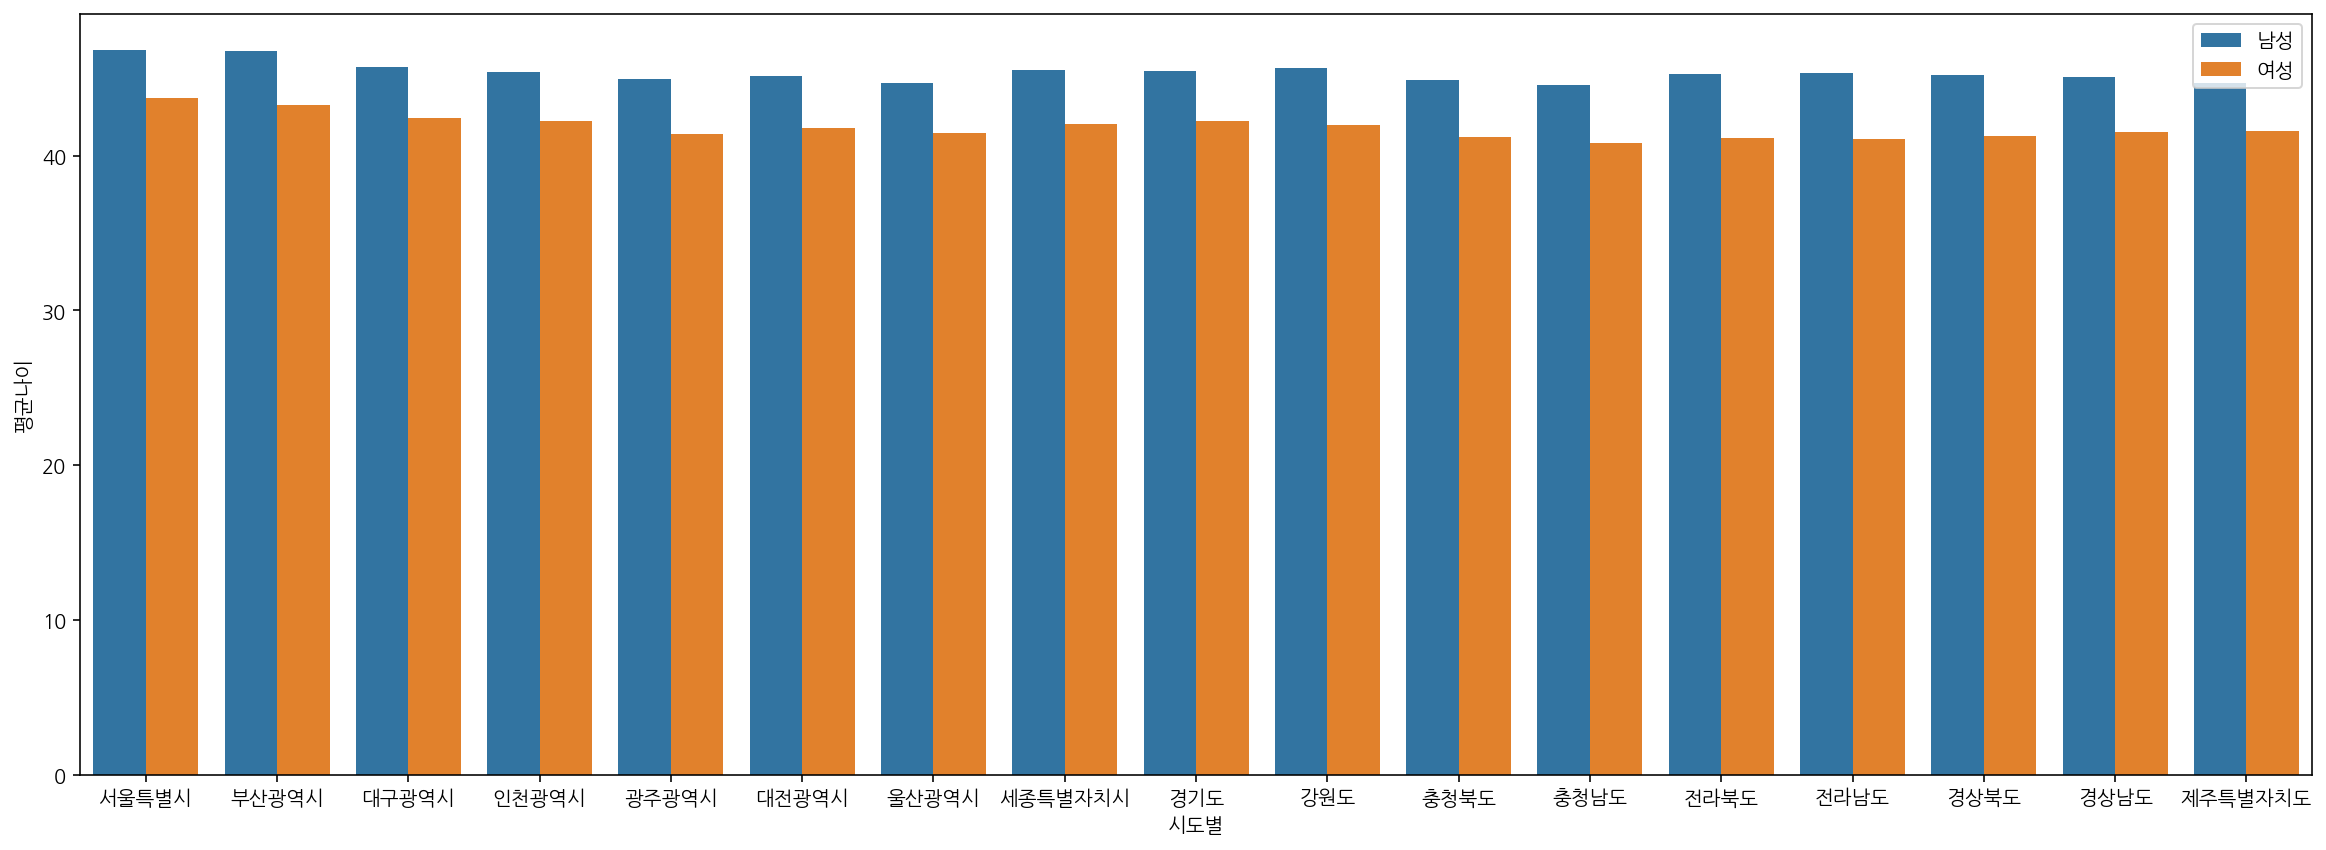

In [202]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df_1, x="시도별", y="평균나이", hue="성별", ci=None);
plt.legend(loc="best");

##### 전국 연도별 이혼건수 시각화

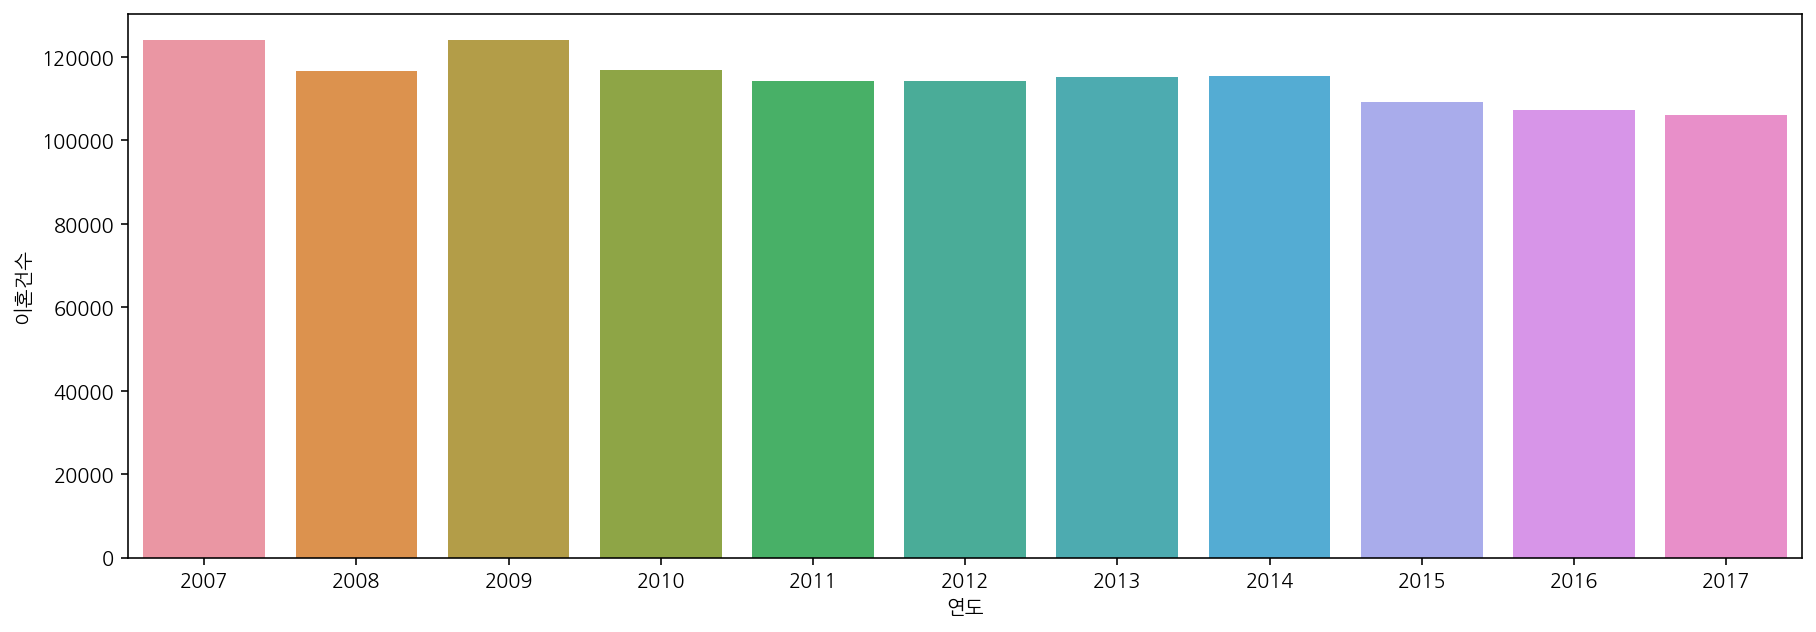

In [204]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_2, x="연도", y="이혼건수", ci=None);

##### 전국 연도별 이혼 평균나이 시각화

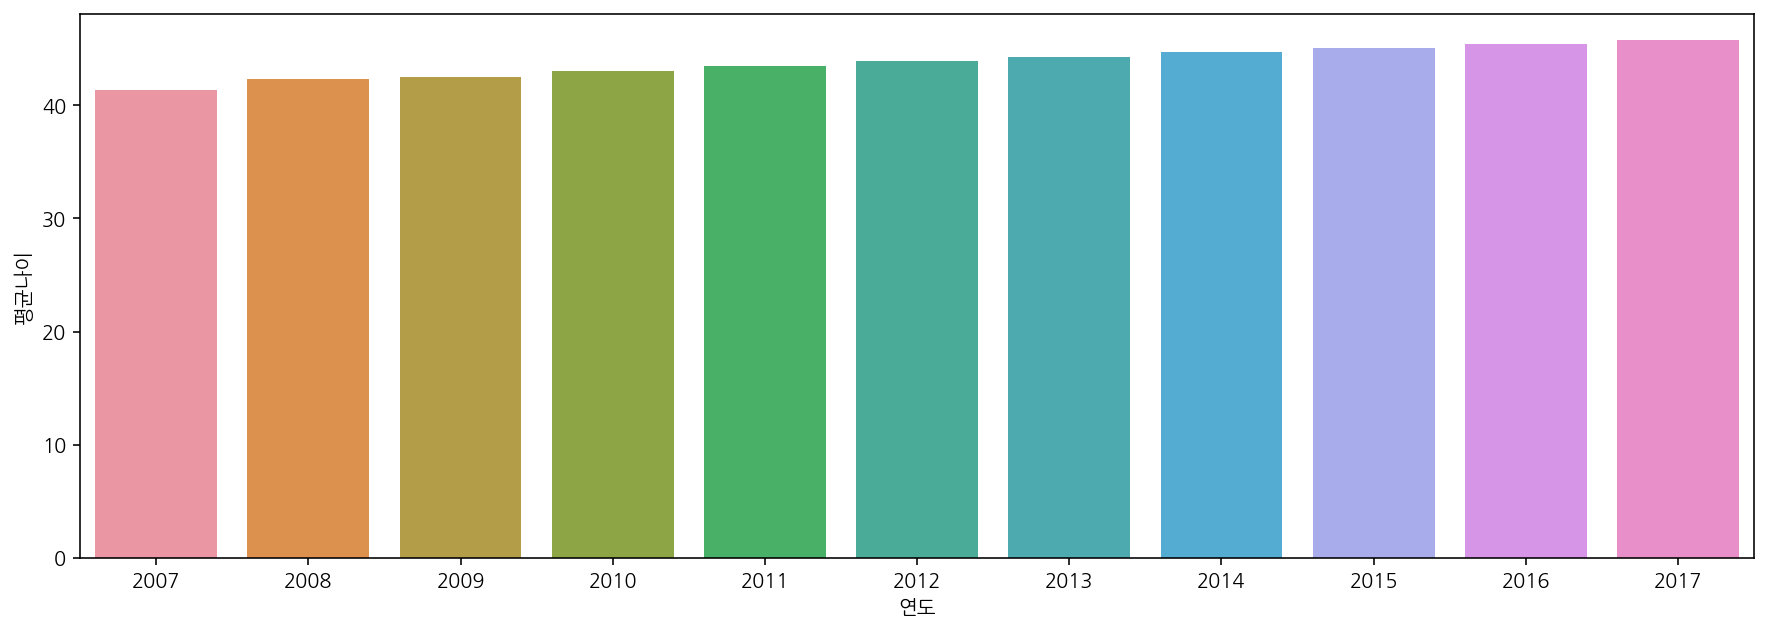

In [205]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_2, x="연도", y="평균나이", ci=None);

##### 직업별 이혼건수를 성별을 구분하여 시각화

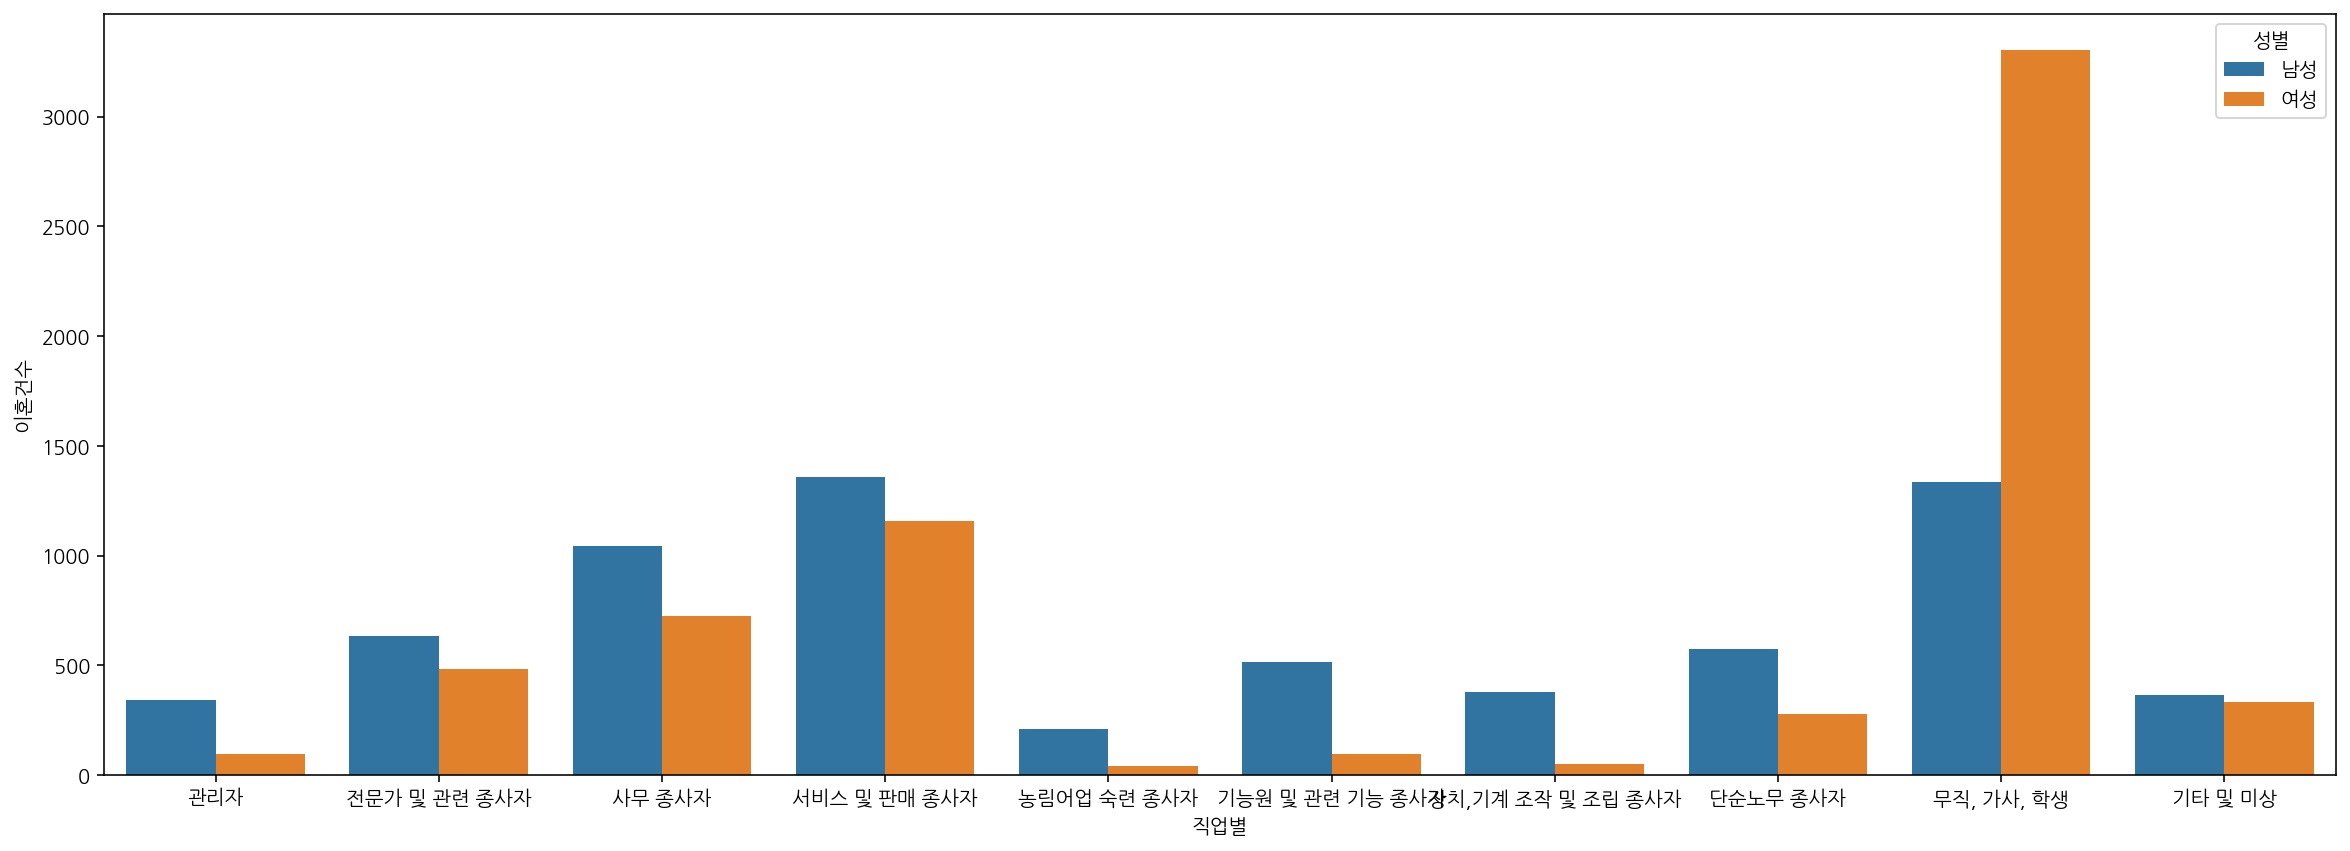

In [208]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df_career, x="직업별", y="이혼건수", hue="성별", ci=None);

## pairplot

##### 성별 특성을 구분한 df_1의 분포/상관분석

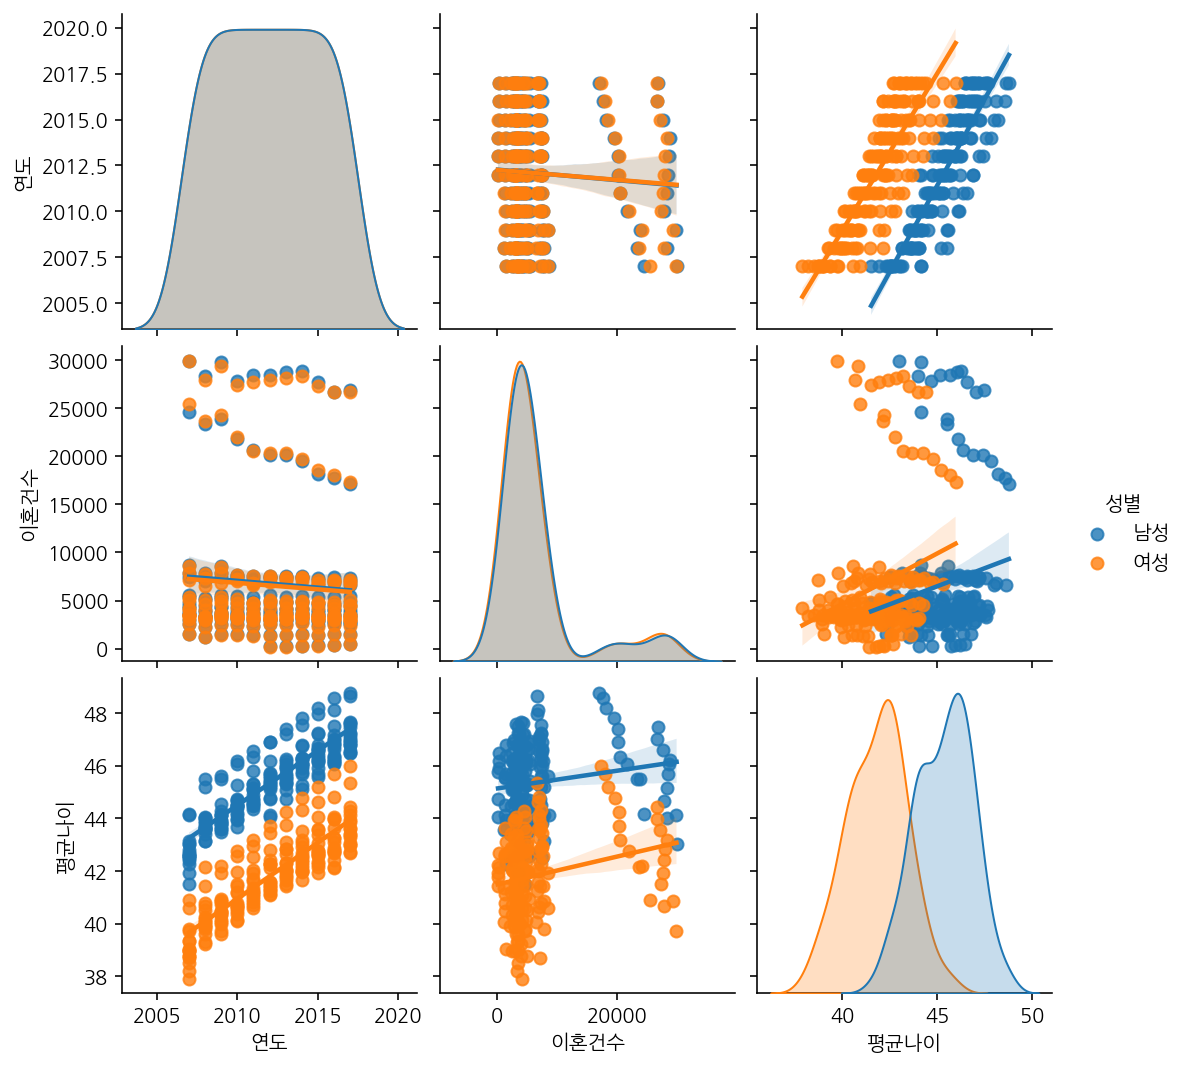

In [244]:
sns.pairplot(df_1, hue="성별", kind="reg");

##### 연도 특성을 구분한 df_1의 분포/상관분석

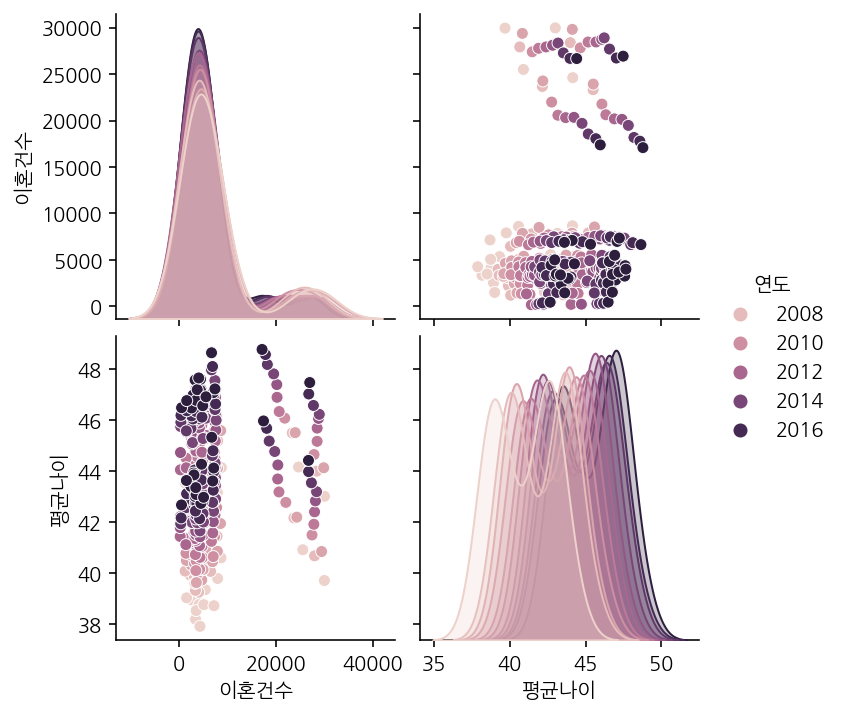

In [236]:
sns.pairplot(df_1, hue="연도");

##### 시도별 특성을 구분한 df_1의 분포/상관분석

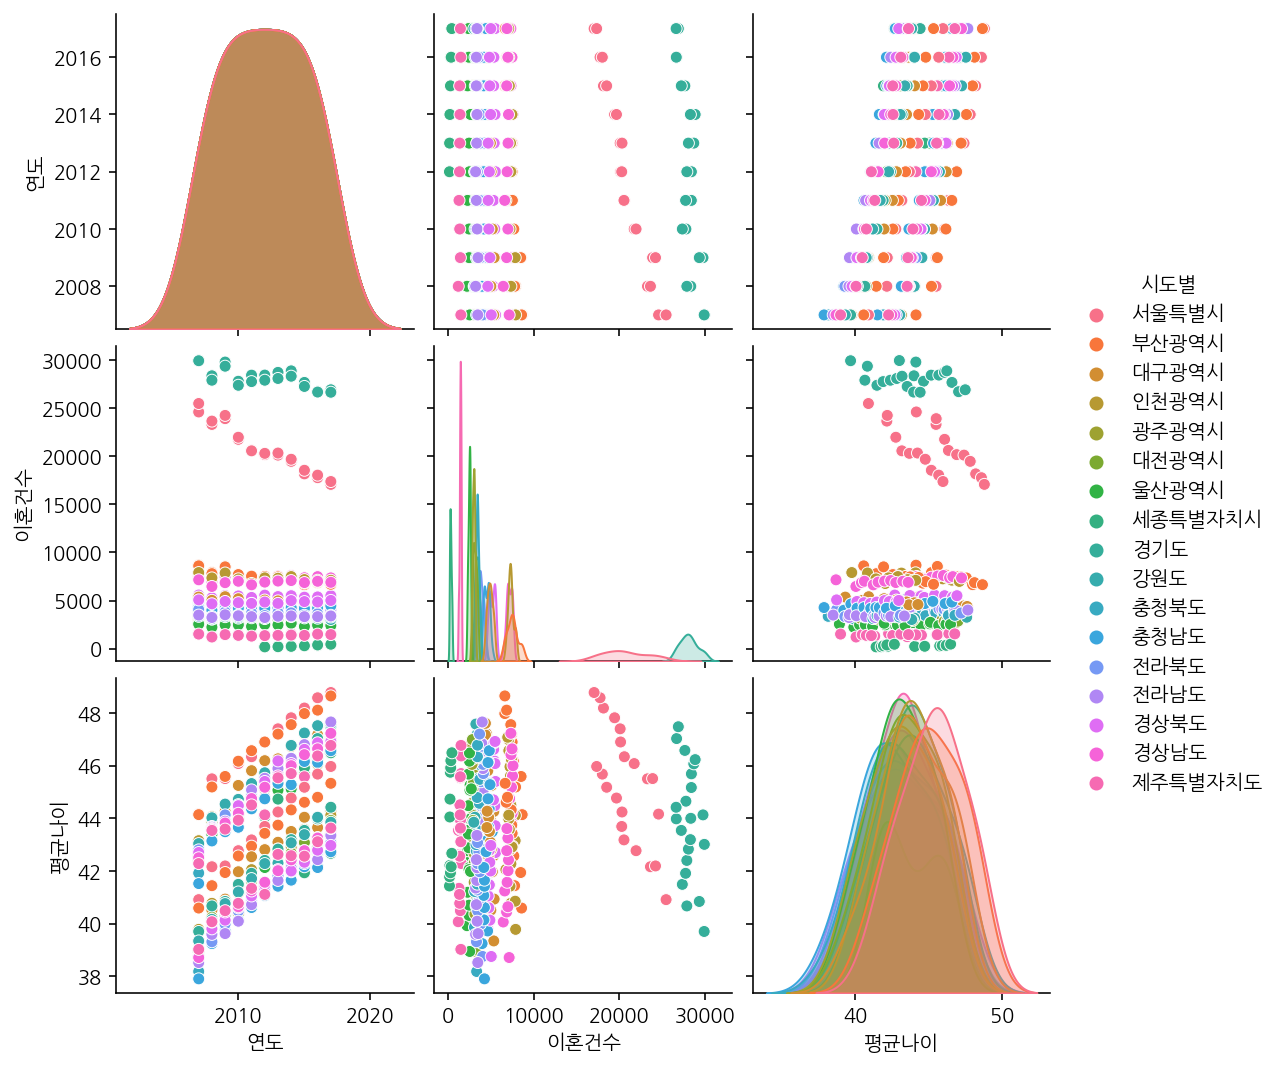

In [238]:
sns.pairplot(df_1, hue="시도별");

##### 연도 특성을 구분한 df_2의 분포/상관분석

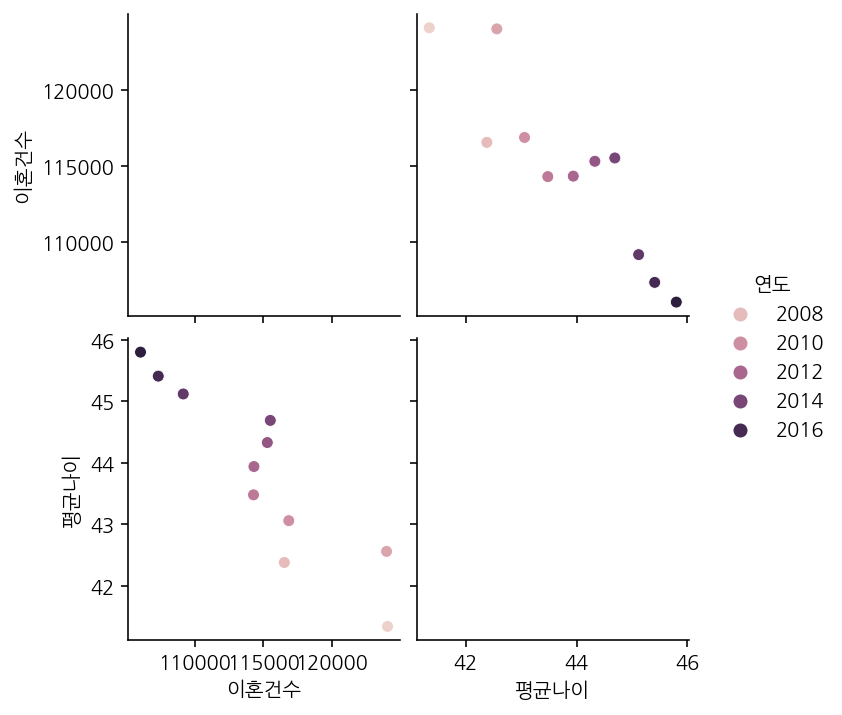

In [240]:
sns.pairplot(df_2, hue="연도");

##### 직업별 특성을 구분한 df_career의 분포/상관분석

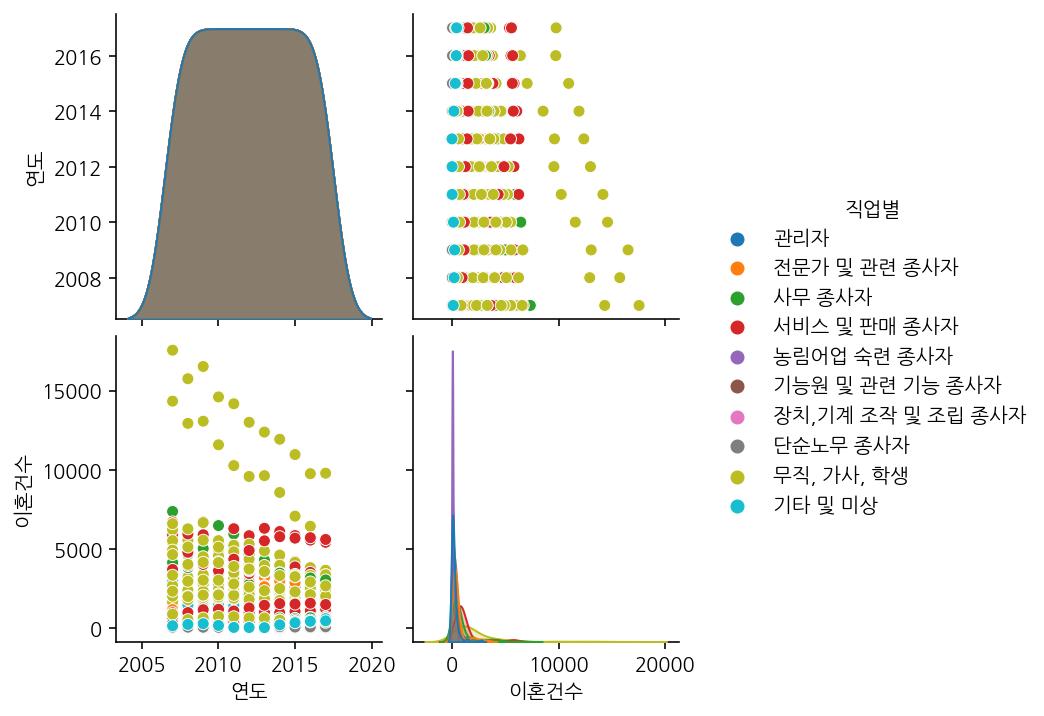

In [231]:
sns.pairplot(df_career, hue="직업별");